In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [56]:
data = pd.read_csv('D:/Text Dataset/youtube.csv')
data

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officially before 7B views,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendation you searched for it,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Checking Views,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help me -_-,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [57]:
# df.drop(['Video Name', 'Channel Name', 'Comment Id', 'User Name', 'Date', 'Likes'], axis=1,inplace=True)
comment = []
comment = data.pop('Comment')
df = pd.DataFrame({'Comment': comment})
df

,Comment
0,The people who liked this comment is officially before 7B views
1,"- Wait, it's 7B views\n- Always has been"
2,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*
3,Let's be honest this wasn't your recommendation you searched for it
4,Types Of People:\n10% Enjoying Song \n90% Checking Views
...,...
19295,Claim your “before 1 billion” certificate here
19296,This means that you are before 1 billion views.
19297,We won't have school till 2021 \nMay God help me -_-
19298,Literally saw this song from 1M -> 996M


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  19300 non-null  object
dtypes: object(1)
memory usage: 150.9+ KB


In [59]:
df.shape

(19300, 1)

In [60]:
# To check full comment
pd.set_option("display.max_colwidth",None)
df.head(10)

,Comment
0,The people who liked this comment is officially before 7B views
1,"- Wait, it's 7B views\n- Always has been"
2,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*
3,Let's be honest this wasn't your recommendation you searched for it
4,Types Of People:\n10% Enjoying Song \n90% Checking Views
5,3.2 Million comments if you find mine your a legend
6,"claim your “here before 7 billion” tickets here, they’ll be out pretty soon 😼"
7,The ones who are NOT from Tik-Tok can like this comment.
8,Song: spanish\nComments: English\nHotel: trivago
9,Kimler burda😂🥰🌹


In [61]:
# Reoving emojies
df = df.astype(str).apply(lambda x: x.str.encode('ascii','ignore').str.decode('ascii'))
df.head(10)

,Comment
0,The people who liked this comment is officially before 7B views
1,"- Wait, it's 7B views\n- Always has been"
2,*Teacher: What is the population of the Earth?*\n\n*Me: Around one Despacito*
3,Let's be honest this wasn't your recommendation you searched for it
4,Types Of People:\n10% Enjoying Song \n90% Checking Views
5,3.2 Million comments if you find mine your a legend
6,"claim your here before 7 billion tickets here, theyll be out pretty soon"
7,The ones who are NOT from Tik-Tok can like this comment.
8,Song: spanish\nComments: English\nHotel: trivago
9,Kimler burda


In [62]:
# Removing Punctuations -
# df1 = df1.replace('\-','',regex=True)
# df1 = df1.replace('\?','',regex=True)
# df1 = df1.replace('\n','',regex=True)
# df1 = df1.replace('*','',regex=True)
# df1 = df1.replace(':','',regex=True)
# df1 = df1.replace('\%','',regex=True)
# df1 = df1.replace('\.','',regex=True)
# df1 = df1.replace('\#','',regex=True)
# df1 = df1.replace('\@','',regex=True)
# df1 = df1.replace('\>','',regex=True)
# df1 = df1.replace('\<','',regex=True)
# df1 = df1.replace('\"','',regex=True)
# df1 = df1.replace('\;','',regex=True)
# df1 = df1.replace('\~','',regex=True)
# df1 = df1.replace('\(','',regex=True)
# df1 = df1.replace('\)','',regex=True)
# df1.head(10)

In [63]:
import sys
import unicodedata
#dictionary of punctuation marks
keys = [i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P')]
# punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))
punctuation = dict.fromkeys(keys,' ')

In [64]:
#dictionary of new_line '\n' and tab '\t'
new_line_tab = str.maketrans({chr(10): ' ', chr(9): ' '})

In [65]:
import re
def preprocessor(text):
    text = re.sub('\n', ' ', text) # remove new lines
    text = re.sub('\t', ' ', text) # remove tabs
    text = re.sub('@[A-Za-z0–9]+', ' ', text) #Removing tag(@)
    text = re.sub('#', ' ', text) # Removing hashtag(#)
#     text = re.sub('https?:\/\/\S+', ' ', text) # Removing links
    text = re.sub(r'http\S+', ' ', text) #remove https links
    text = re.sub('<[^<]+?>', ' ', text) #remove html tags
    text = re.sub(r'[^\w]', ' ', text) #remove non-alphanumerc characters
#     text = re.sub('httpS+s*', ' ', text)  # remove URLs
#     text = re.sub('RT|cc', ' ', text)  # remove RT and cc
#     text = re.sub('#S+', '', text)  # remove hashtags
#     text = re.sub('@S+', '  ', text)  # remove mentions
#     text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
#     text = re.sub(r'[^x00-x7f]',r' ', text) 
    text = text.translate(punctuation)
#     text = re.sub('s+', ' ', text)  # remove extra whitespace
    text = text.lower()
    text = text.strip()
    text = text.translate(new_line_tab)
    return text
df['Comment'] = df['Comment'].apply(lambda x: preprocessor(x))

In [66]:
df

,Comment
0,the people who liked this comment is officially before 7b views
1,wait it s 7b views always has been
2,teacher what is the population of the earth me around one despacito
3,let s be honest this wasn t your recommendation you searched for it
4,types of people 10 enjoying song 90 checking views
...,...
19295,claim your before 1 billion certificate here
19296,this means that you are before 1 billion views
19297,we won t have school till 2021 may god help me
19298,literally saw this song from 1m 996m


In [13]:
# # Cleaning punctuations
# import string
# english_punctuations = string.punctuation
# punctuations_list = english_punctuations
# def cleaning_punctuations(Comment):
# #     translator = str.maketrans('','',punctuations_list)
#     return Comment.translate(translator)
# df1.Comment = df1.Comment.apply(lambda x: cleaning_punctuations(x))
# df1.head(10)

In [14]:
# Checking some comments
pd.set_option("display.max_colwidth",-1) # To see full comment
# df1.head(10) # for first 10 rows
df.sample(10) # for random 10 rows

<ipython-input-14-80ce6738f131>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1) # To see full comment


,Comment
17693,who is listening to this song in 2021
9472,that guitar finally found the magical fingers that it deserves
10542,let s be honest this guy owned the world for a while
17270,who else is listening to this during the corona isolation
5130,3 years later if you re watching this you re a legend
11642,are we gonna ignore the fact that the two parents ignored the fact that their daughter was sleeping with the school jock
234,rip michael jackson rip paul walker rip johan cruyff rip eazy e rip bruce lee rip bob marley rip freddie mercury rip tupac shakur rip the notorious b i g rip heath ledger rip stan lee rip george michael rip muhammad ali rip chester bennington rip chapecoense plane crash victims rip lil peep rip stephen hawking rip avicii rip xxxtentacion rip mac miller rip emiliano sala rip cameron boyce rip grant thompson rip etika rip juice wrld rip kobe bryant gianna bryant rip irrfan khan rip sushant singh rajput rip pop smoke rip naya rivera rip chadwick boseman rip to all soldiers who sacrifice our lives rip to all the people whom died from covid 19 legends never die they live in our hearts
19126,vayan a tuitear todos stream sin contrato que nos falta menos de 54 000 para llegar hoy a la meta tambin lo pueden comentar en otras canciones de maluma y compartir la cancin en sus redes sociales
3526,she broke the rules she is completely in love with him
11737,4 years later if you re watching this you re a legend


In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df['Comment'] = df['Comment'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))
df.head(10)

,Comment
0,people liked comment officially 7b views
1,wait 7b views always
2,teacher population earth around one despacito
3,let honest recommendation searched
4,types people 10 enjoying song 90 checking views
5,3 2 million comments find mine legend
6,claim 7 billion tickets theyll pretty soon
7,ones tik tok like comment
8,song spanish comments english hotel trivago
9,kimler burda


In [27]:
df = [x.strip() for x in df.Comment] # Remove leading and Trailing characters
df = [x for x in df if x] # It removes empty strings, because they are considered as False in python

In [28]:
# !pip install afinn
from afinn import Afinn

In [29]:
afn = Afinn()

In [30]:
# Compute score (polarity) and labels
scores = [afn.score(Comment) for Comment in df]
sentiment = ['happy' if score > 0
                        else 'sad' if score < 0
                            else 'neutral'
                                for score in scores]

In [32]:
# Creating the dataframe
sent_df = pd.DataFrame()
sent_df['title'] = df
sent_df['scores'] = scores
sent_df['sentiments'] = sentiment

In [33]:
sent_df.head(50)

,title,scores,sentiments
0,people liked comment officially 7b views,2.0,happy
1,wait 7b views always,0.0,neutral
2,teacher population earth around one despacito,0.0,neutral
3,let honest recommendation searched,2.0,happy
4,types people 10 enjoying song 90 checking views,2.0,happy
5,3 2 million comments find mine legend,0.0,neutral
6,claim 7 billion tickets theyll pretty soon,1.0,happy
7,ones tik tok like comment,2.0,happy
8,song spanish comments english hotel trivago,0.0,neutral
9,kimler burda,0.0,neutral


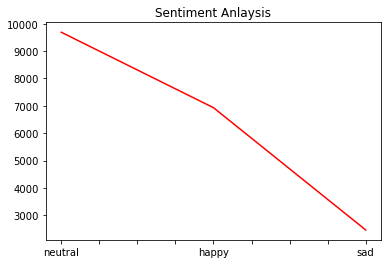

In [35]:
sent_df.sentiments.value_counts().plot(kind='line', color='red')
plt.title('Sentiment Anlaysis')
plt.show()

In [36]:
sent_df['word_count'] = sent_df['title'].str.split().apply(len)
sent_df.head(10)

,title,scores,sentiments,word_count
0,people liked comment officially 7b views,2.0,happy,6
1,wait 7b views always,0.0,neutral,4
2,teacher population earth around one despacito,0.0,neutral,6
3,let honest recommendation searched,2.0,happy,4
4,types people 10 enjoying song 90 checking views,2.0,happy,8
5,3 2 million comments find mine legend,0.0,neutral,7
6,claim 7 billion tickets theyll pretty soon,1.0,happy,7
7,ones tik tok like comment,2.0,happy,5
8,song spanish comments english hotel trivago,0.0,neutral,6
9,kimler burda,0.0,neutral,2


In [37]:
sent_df['scores'].describe()

count    19087.000000
mean     1.203123    
std      6.620740    
min     -64.000000   
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      319.000000  
Name: scores, dtype: float64

C:\Users\shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scores', ylabel='Density'>

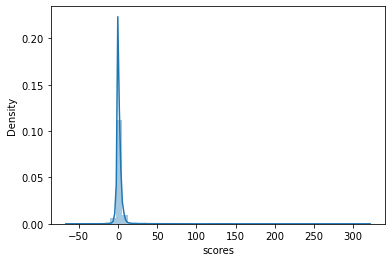

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['scores'])

In [39]:
sent_df['index'] = range(0, len(sent_df))

<AxesSubplot:xlabel='index', ylabel='scores'>

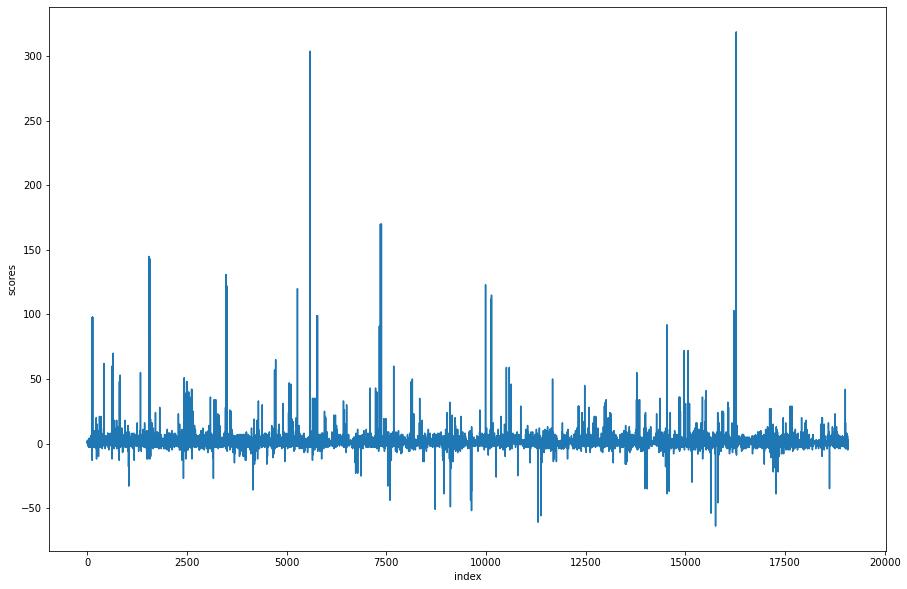

In [40]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='scores', x='index', data=sent_df)

<AxesSubplot:title={'center':'Sentiment value to sentence word count'}, xlabel='word_count', ylabel='scores'>

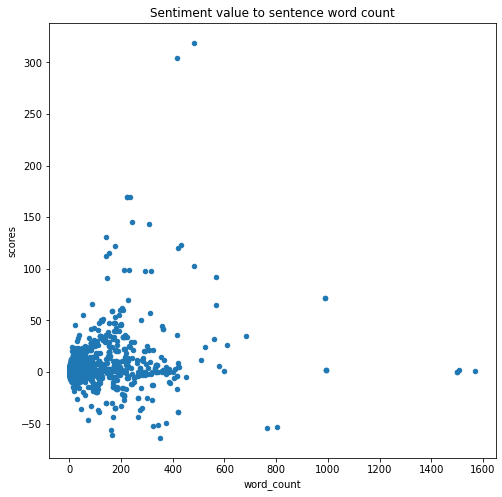

In [41]:
sent_df.plot.scatter(x='word_count', y='scores', figsize=(8,8), title="Sentiment value to sentence word count")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


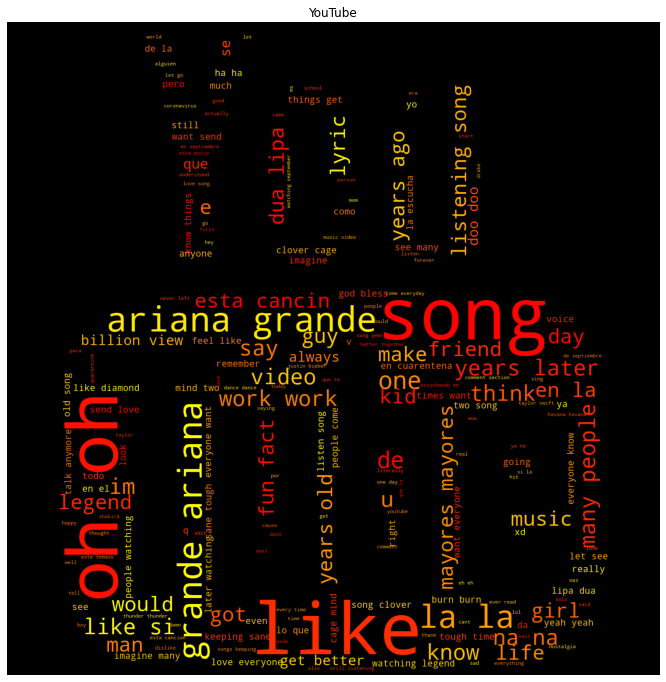

In [78]:
# setting up stop words 
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords = ' '.join([Comments for Comments in sent_df['title']])
 
# # Image we will use for Word's cloud mask
# from google.colab import files
# uploaded = files.upload()
 
# # by default files are uploaded in /content folder 
# import cv2
# image = cv2.imread('/content/'+next(iter(uploaded))) 
# !pip install opencv-python
import cv2
image = cv2.imread('C:/Users/shree/Downloads/youtube-logotype.png') 
YouTube = image

# word cloud
def word_cloud(data, title, mask=None):
    Cloud = WordCloud(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=stpwrd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
 
# plot it
word_cloud(allWords, 'YouTube', mask=YouTube)